# Numerical Integration Precision

We observe the limits of the trapezoidal rule for numerical integration. First, we'll start with some imports and definitions:

In [50]:
import numpy as np
from pathlib import Path
from gravann.functions import error_calculation
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2


input_directory_polyhedral = Path("F:/results/cg/polyhedral-total-seed-3/churyumov-gerasimenko/polyhedral/it-id-0000")
input_directory_mascon = Path("F:/results/cg/polyhedral-total-seed-3/churyumov-gerasimenko/mascon/it-id-0018")
max_exp = 21
n_integration = np.logspace(2, max_exp, num=max_exp - 1, base=2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We then compute the relative error for different step-sizes when comparing the integral to the analytical solution.

In [4]:
max_bound = 2.0
print(f"Polyhedral Model with max_bound={max_bound}")
print(error_calculation.error_calculation(input_directory_polyhedral, n_integration, max_bound))
print(f"Mascon Model with max_bound={max_bound}")
print(error_calculation.error_calculation(input_directory_mascon, n_integration, max_bound))

Polyhedral Model with max_bound=2.0
[1.000977635383606, 1.000977635383606, 0.9260651469230652, 0.9260651469230652, 1.0402570962905884, 0.25204235315322876, 0.11263398826122284, 0.09669473022222519, 0.019722064957022667, 0.03310984745621681, 0.0173189677298069, 0.017433326691389084, 0.009105526842176914, 0.008555843494832516, 0.009393975138664246, 0.01032522413879633, 0.009514236822724342]
None
Mascon Model with max_bound=2.0
[1.0007591247558594, 1.0007591247558594, 1.649813175201416, 1.649813175201416, 8.26657485961914, 2.151057243347168, 1.4949026107788086, 0.49322524666786194, 0.2248481810092926, 0.7039282917976379, 0.49001047015190125, 0.20231002569198608, 0.09502996504306793, 0.10354224592447281, 0.07928629219532013, 0.08355464786291122, 0.08783616125583649]
None


In [5]:
max_bound = 1.0
print(f"Polyhedral Model with max_bound={max_bound}")
print(error_calculation.error_calculation(input_directory_polyhedral, n_integration, max_bound))
print(f"Mascon Model with max_bound={max_bound}")
print(error_calculation.error_calculation(input_directory_mascon, n_integration, max_bound))

Polyhedral Model with max_bound=1.0
[0.9987804889678955, 0.9987804889678955, 7.397008419036865, 7.397008419036865, 4.87523078918457, 4.840843677520752, 1.0168821811676025, 0.6551875472068787, 0.3890206813812256, 0.21436166763305664, 0.24237596988677979, 0.14483220875263214, 0.0306258387863636, 0.049448467791080475, 0.043460458517074585, 0.03612111881375313, 0.03315385431051254]
None
Mascon Model with max_bound=1.0
[0.9999669194221497, 0.9999669194221497, 1.5939613580703735, 1.5939613580703735, 2.3307559490203857, 0.8276010155677795, 0.48942118883132935, 0.43457406759262085, 0.1900831162929535, 0.12205377966165543, 0.10335052758455276, 0.08221351355314255, 0.0835912823677063, 0.07633327692747116, 0.07469092309474945, 0.07765748351812363, 0.07685858756303787]
None


In [6]:
max_bound = 0.5
print(f"Polyhedral Model with max_bound={max_bound}")
print(error_calculation.error_calculation(input_directory_polyhedral, n_integration, max_bound))
print(f"Mascon Model with max_bound={max_bound}")
print(error_calculation.error_calculation(input_directory_mascon, n_integration, max_bound))

Polyhedral Model with max_bound=0.5
[1.0000308752059937, 1.0000308752059937, 20.959867477416992, 20.959867477416992, 3.089304208755493, 7.0330810546875, 1.252335548400879, 0.9352840185165405, 0.47974660992622375, 0.34772905707359314, 0.20844830572605133, 0.14067378640174866, 0.04759502038359642, 0.0344189815223217, 0.034704193472862244, 0.03088027983903885, 0.027411585673689842]
None
Mascon Model with max_bound=0.5
[0.9999152421951294, 0.9999152421951294, 13.388066291809082, 13.388066291809082, 3.279863119125366, 2.8913626670837402, 0.8701159954071045, 0.9166197776794434, 0.3889414668083191, 0.30115631222724915, 0.1857193559408188, 0.14160317182540894, 0.10888990759849548, 0.07756892591714859, 0.08009471744298935, 0.07762687653303146, 0.08013113588094711]
None


In [31]:
df = pd.DataFrame()
max_bound = [0.5, 1.0, 5.0]
print("Polyhedral Model")
for bound in tqdm(max_bound):
    error = error_calculation.error_calculation(input_directory_polyhedral, n_integration, bound)
    df = df.append({"model": "polyhedral", "max_bound": bound, **error}, ignore_index=True)
print("Mascon Model")
for bound in tqdm(max_bound):
    error = error_calculation.error_calculation(input_directory_mascon, n_integration, bound)
    df = df.append({"model": "mascon", "max_bound": bound, **error}, ignore_index=True)
df.to_csv("error.csv")

Polyhedral Model


100%|██████████| 3/3 [02:15<00:00, 45.04s/it]


Mascon Model


100%|██████████| 3/3 [02:12<00:00, 44.33s/it]


In [32]:
df

,model,max_bound,4.0,8.0,16.0,32.0,64.0,128.0,256.0,512.0,...,4096.0,8192.0,16384.0,32768.0,65536.0,131072.0,262144.0,524288.0,1048576.0,2097152.0
0,polyhedral,0.5,1.000006,1.000006,10.823578,10.823578,1.815382,1.350719,2.933050,0.777533,...,0.214826,0.145140,0.064019,0.059471,0.021668,0.028371,0.020684,0.015634,0.017992,0.015491
1,polyhedral,1.0,1.000151,1.000151,2.132473,2.132473,2.738004,0.803874,0.971642,0.427360,...,0.092431,0.059882,0.024611,0.029410,0.020316,0.020610,0.016076,0.011742,0.012909,0.011496
2,polyhedral,5.0,0.997843,0.997843,0.844703,0.844703,0.413876,0.126156,0.129405,0.069437,...,0.019957,0.013920,0.006189,0.011244,0.012853,0.011293,0.009380,0.009794,0.009539,0.009308
3,mascon,0.5,1.000022,1.000022,12.181632,12.181632,2.761377,1.966577,2.400542,1.006770,...,0.378410,0.228518,0.172321,0.099188,0.101899,0.083965,0.076342,0.081238,0.080921,0.080443
4,mascon,1.0,1.000293,1.000293,2.111290,2.111290,4.210481,0.788776,1.494099,0.929924,...,0.173944,0.156175,0.093367,0.094063,0.079123,0.081758,0.074129,0.073426,0.073274,0.073538
5,mascon,5.0,0.999422,0.999422,0.781020,0.781020,0.432750,0.123849,0.077401,0.123014,...,0.046602,0.062723,0.065463,0.069297,0.070997,0.070682,0.070868,0.071054,0.071177,0.071297


In [33]:
dfm = df.melt(["model", "max_bound"], var_name="n_integration", value_name="relative_error")
dfm

,model,max_bound,n_integration,relative_error
0,polyhedral,0.5,4.0,1.000006
1,polyhedral,1.0,4.0,1.000151
2,polyhedral,5.0,4.0,0.997843
3,mascon,0.5,4.0,1.000022
4,mascon,1.0,4.0,1.000293
...,...,...,...,...
115,polyhedral,1.0,2097152.0,0.011496
116,polyhedral,5.0,2097152.0,0.009308
117,mascon,0.5,2097152.0,0.080443
118,mascon,1.0,2097152.0,0.073538


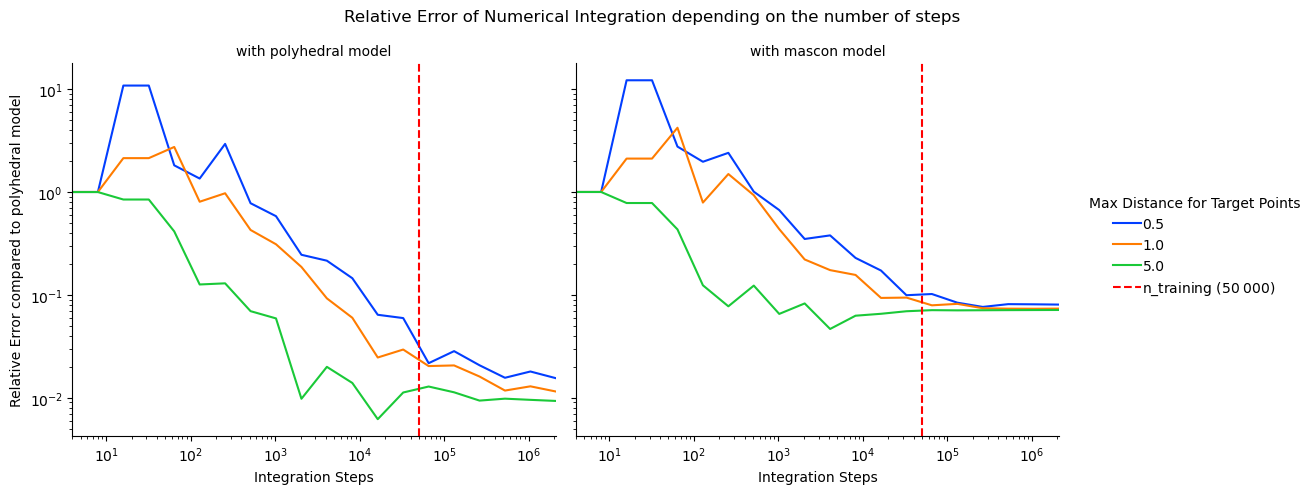

In [72]:
g = sns.relplot(
    data=dfm, kind="line",
    x="n_integration", y="relative_error", col="model",
    hue="max_bound", palette='bright'
)
g.set(xlim=(4.0, 2097152.0), xscale='log', yscale='log', xlabel="Integration Steps", ylabel="Relative Error compared to polyhedral model")
g.set_titles("with {col_name} model")
g.fig.suptitle("Relative Error of Numerical Integration depending on the number of steps")
g.map(plt.axvline, x=50000, ls='--', c='red', label="n_training ($50\;000$)")
g.legend.remove()
g.add_legend(handletextpad=0.1, title="Max Distance for Target Points")
g.tight_layout()
g.savefig("error.png", dpi=300)